## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Loading Dataset

In [2]:
data = pd.read_parquet('../data/green_tripdata_2021-01.parquet')

In [3]:
df = data.copy()

In [4]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [5]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

## Data Preprocessing

In [6]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [10]:
df = df[(df.duration >= 1 & (df.duration <= 60))]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

## Exploratory Data Analysis

In [12]:
## lets check for missing values
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       36027
RatecodeID               36027
PULocationID                 0
DOLocationID                 0
passenger_count          36027
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                75070
improvement_surcharge        0
total_amount                 0
payment_type             36027
trip_type                36027
congestion_surcharge     36027
duration                     0
dtype: int64

In [13]:
## compute the correlation using pearson
numerical_data = df.select_dtypes(exclude=[object])

In [14]:
##
print(numerical_data.shape)

(75070, 17)


In [31]:
corr_matrix = numerical_data.corr()
corr_matrix['duration'].sort_values(ascending=False)

duration                 1.000000
fare_amount              0.184797
total_amount             0.182151
tolls_amount             0.092959
VendorID                 0.035263
RatecodeID               0.026423
trip_type                0.022627
tip_amount               0.018916
congestion_surcharge     0.003307
extra                    0.002574
trip_distance            0.001583
improvement_surcharge   -0.002766
passenger_count         -0.006115
mta_tax                 -0.012409
payment_type            -0.024703
lpep_dropoff_datetime   -0.030481
lpep_pickup_datetime    -0.032192
Name: duration, dtype: float64

### Target Variable Analysis

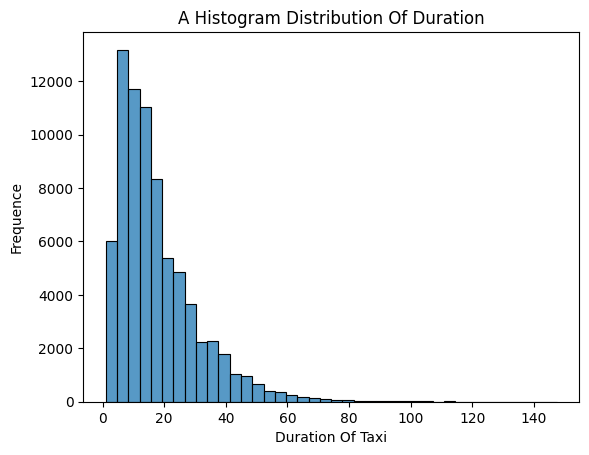

In [22]:
sns.histplot(df.duration[df.duration < 150], bins=40)

plt.title('A Histogram Distribution Of Duration')
plt.xlabel('Duration Of Taxi')
plt.ylabel('Frequence')

plt.show()


In [23]:
## lets normalize the target variable by applying log transformation
log_duration = np.log1p(df.duration)

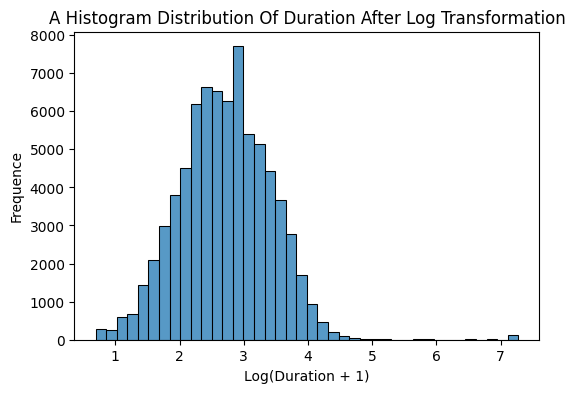

In [25]:
plt.figure(figsize=(6, 4))

sns.histplot(log_duration, bins=40)

plt.title('A Histogram Distribution Of Duration After Log Transformation')
plt.xlabel('Log(Duration + 1)')
plt.ylabel('Frequence')

plt.show()

## Model Training